# Simple Jet Dispersion Models

Simple jet dispersion models are a useful tool for evaluating dispersion near the region where a jet release is occurring. They are based on a simplified model where the air is stationary and all of the momentum needed to mix the release is supplied by the jet. This is in some ways the opposite assumptions than are used in the Gaussian Plume model -- where the release is assumed to have negligible velocity and the momentum is entirely supplied by the wind.

$$ c = k_2 c_0 \left( d \over z \right) \sqrt{ \rho_j \over \rho_a } \exp \left( - \left( k_3 { y \over x } \right)^2 \right) \\ \times \left[ \exp \left( - \left( k_3 { (z-h) \over x }\right)^2 \right) + \exp \left( - \left( k_3 { (z+h) \over x }\right)^2 \right) \right]$$

With 
+ model parameters $k_2$ and $k_3$
+ initial concentration, $c_0$
+ diameter of the jet, $d$
+ initial density of the jet material, $\rho_j$
+ density of the ambient atmosphere, $\rho_a$

## Model Parameters

The model parameters $k_2$ and $k_3$ are per Long, V.D., "Estimation of the Extent of Hazard Areas Around a Vent", *Chem. Process Hazard*, II, 6, 1963

|       |     |
|------:|:----|
| $k_2$ | 6.0 |
| $k_3$ | 5.0 |

the initial concentration is calculated from the mass flowrate and volumetric flowrate

$$ c_0 = { \dot{m} \over \rho_j Q } = { \dot{m} \over { \rho_j \frac{\pi}{4} d^2 u } } $$


## Example

This scenario is adapted from CCPS *Guidelines for Consequence Analysis of
Chemical Releases*, CCPS, pg 47.

Suppose we wish to model the dispersion of gaseous propane from a leak from a storage tank, where the leak is from a 10 mm hole that is 3.5 m above the ground and the propane is at 25°C and 4barg. Assume the discharge coefficient $c_{D} = 0.85$

In [1]:
using GasDispersion

Patm = 101325 # Pa
P1 = 4e5 + Patm # Pa
T1 = 25 + 273.15 # K

propane = Substance(name = :propane,
            gas_density = 9.7505, # Propane, NIST Webbook
            liquid_density = 526.13, # Propane, NIST Webbook
            reference_temp= T1,
            reference_pressure= P1,
            boiling_temp = 231.04, # Propane, NIST Webbook
            latent_heat = 425740.0, # J/kg, 
            gas_heat_capacity = 1678.0, # J/kg/K, 
            liquid_heat_capacity = 2520.0) # J/kg/K

scn = scenario_builder(propane, JetSource; 
       phase = :gas,
       diameter = 0.01, # m
       dischargecoef = 0.85,
       k = 1.15,         # heat capacity ratio, from Crane's
       temperature = T1, # K
       pressure = P1,    # Pa
       height = 3.5)     # m, height of hole above the ground

Substance: propane 
Release conditions:
    ṁ: 0.09426204511744017 kg/s 
    Δt: Inf s 
    d: 0.01 m 
    u: 199.34706765725818 m/s 
    h: 3.5 m 
    P: 287952.6877282304 Pa 
    T: 277.3488372093023 K 
    f_l: 0.0  
Atmospheric conditions:
    P: 101325 Pa 
    T: 298.15 K 
    Rs: 287.0500676 J/kg/K 
    u: 1.5 m/s 
    h: 10 m 
    stability: ClassF  


In [2]:
pl = plume(scn, SimpleJet);

In [3]:
pl(100,0,2)

0.0025999229261935283

In [4]:
a, b = 6.0, 5.0
ξ² = log(2)/b^2
x, y, z =  a, √(a^2*ξ²), 1.0

pl(x,y,z)

0.00014695820366436948

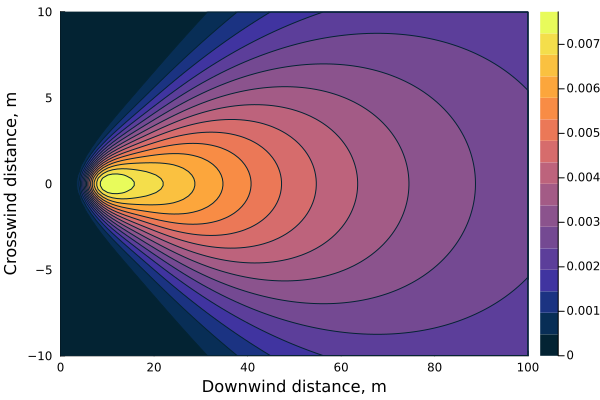

In [5]:
using Plots

plot(pl, xlims=(0,100), ylims=(-10,10), height=2)